# **Financial Risk Exploratory Data Analysis**

# **Data Dictionary**

- **1. tipo_credito:**
- **2. fecha_prestamo:**
- **3. capital_prestado:**
- **4. plazo_meses:**
- **5. edad_cliente:**
- **6. tipo_laboral:**
- **7. salario_cliente:**
- **8. total_otros_prestamos:**
- **9. cuota_pactada:**
- **10. puntaje:**
- **11. puntaje_datacredito:**
- **12. cant_creditosvigentes:**
- **13. huella_consulta:**
- **14. saldo_mora:**
- **15. saldo_total:**
- **16. saldo_principal:**
- **17. saldo_mora_codeudor:**
- **18. creditos_sectorFinanciero:**
- **19. creditos_sectorCooperativo:**
- **20. creditos_sectorReal:**
- **21. promedio_ingresos_datacredito:**
- **22. tendencia_ingresos:**
- **23. Pago_atiempo:**

# **Clasificación de Variables**


# **1. Numéricas**


### **1.1. Discretas**

* edad_cliente
* plazo_meses
* total_otros_prestamos
* cant_creditosvigentes
* creditos_sectorFinanciero
* creditos_sectorCooperativo
* creditos_sectorReal
* huella_consulta

### **1.2. Continuas**

* capital_prestado
* salario_cliente
* cuota_pactada
* puntaje
* puntaje_datacredito
* saldo_mora
* saldo_total
* saldo_principal
* saldo_mora_codeudor
* promedio_ingresos_datacredito


# **2. Categóricas**


### **2.1. Politómicas**

* tipo_credito
* tendencia_ingresos

### **2.2. Dicotómicas**

* tipo_laboral

# **3. Otras**

* **3.1. TARGET:** pago_atiempo

* **3.2. FECHA:** fecha_prestamo

In [1]:
# Importación de Librerías

import os
from dotenv import load_dotenv
from pathlib import Path
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import kurtosis
from scipy.stats import skew
import scipy.stats as st

In [2]:
# Cargar Environment

pth = Path(os.getenv("DATA_FILE"))

# Cargar Data

df = pd.read_excel(pth / "BD_creditos.xlsx")

df.sample(10)

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
9352,4,2025-01-22 15:38:36,839880.0,12,26,Empleado,1700000,600000,58325,95.227787,...,0.0,2308.0,2308.0,0.0,2,0,1,954022.0,Creciente,1
6701,4,2025-01-16 13:18:42,672000.0,6,39,Independiente,2000000,500000,99901,95.227787,...,0.0,1824.0,1824.0,0.0,0,0,1,NaN,NaN,1
6538,9,2025-05-03 18:52:16,2018306.4,11,53,Independiente,3000000,1500000,157478,95.227787,...,0.0,1712.0,1712.0,0.0,6,0,0,NaN,NaN,1
7749,4,2026-01-03 14:15:34,828000.0,12,36,Empleado,3039000,1135000,69000,95.227787,...,0.0,62564.0,62564.0,0.0,3,0,3,NaN,NaN,1
7413,4,2025-01-16 14:54:28,1032240.0,10,35,Empleado,1200000,300000,95317,95.227787,...,0.0,5696.0,5696.0,0.0,2,0,0,1136640.0,Creciente,1
10018,4,2025-01-19 13:51:23,1552680.0,12,23,Independiente,2200000,500000,107825,95.227787,...,0.0,0.0,0.0,0.0,2,0,1,908526.0,Estable,1
4556,4,2024-12-28 14:47:24,1150440.0,8,48,Empleado,2000000,400000,130477,67.308656,...,0.0,8334.0,8334.0,0.0,6,0,5,817674.0,Decreciente,1
8911,4,2025-01-06 10:44:42,852000.0,10,35,Empleado,2500000,1500000,78534,95.227787,...,0.0,46260.0,33650.0,0.0,4,1,0,2086283.0,Creciente,1
1938,4,2025-01-07 09:12:44,2111641.2,12,37,Independiente,1500000,700000,146642,95.227787,...,0.0,0.0,0.0,0.0,0,0,1,916148.0,8315,1
5271,4,2025-06-06 12:17:27,1311600.0,6,46,Independiente,3500000,2000000,197163,95.227787,...,0.0,16588.0,16588.0,0.0,2,0,2,NaN,NaN,1


# Datos Generales del Dataset

In [3]:
# Dataset Dimensiones

df.shape

(10763, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

In [5]:
# Cambio de tipo de dato a la variable objetivo

df['Pago_atiempo'] = df['Pago_atiempo'].astype('category')

In [6]:
# Ver las clases en columnas de tipo "object"

df["tipo_laboral"].unique()

array(['Empleado', 'Independiente'], dtype=object)

In [7]:
# Ver las clases en columnas de tipo "object"

df["tendencia_ingresos"].unique()

array(['Creciente', nan, 'Estable', 'Decreciente', 8315, 0, 158042, 3978,
       9147, 168750, -28589, 1000000, -566272, 24702, 31837, 122727,
       417087, 9090, 173031, -70715, -435177, -702927, -4105, 54683,
       22832, 209090, 5697, -288, -164315, 2029000, 17181, 15245, 82657,
       52862, 1817052, 75761, 146918, 1123000, 15090, 4250635, 22363,
       -101368, 86286, 65988, 77975, -224714, 10808], dtype=object)

# Corrreción de Valores

In [8]:
df['tendencia_ingresos'].unique()

array(['Creciente', nan, 'Estable', 'Decreciente', 8315, 0, 158042, 3978,
       9147, 168750, -28589, 1000000, -566272, 24702, 31837, 122727,
       417087, 9090, 173031, -70715, -435177, -702927, -4105, 54683,
       22832, 209090, 5697, -288, -164315, 2029000, 17181, 15245, 82657,
       52862, 1817052, 75761, 146918, 1123000, 15090, 4250635, 22363,
       -101368, 86286, 65988, 77975, -224714, 10808], dtype=object)

In [9]:
# Corrección de datos para la variable "tendencia_ingresos"

clases_validas = ['Creciente', 'Estable', 'Decreciente']

df['tendencia_ingresos'] = df['tendencia_ingresos'].apply(lambda x: x if x in clases_validas else np.nan)

In [10]:
df['tendencia_ingresos'].nunique()

3

# Conteo de Duplicados

In [11]:
# Verificación de registros duplicados

print(f"El dataset tiene {df.duplicated().sum()} duplicados")

El dataset tiene 0 duplicados


# Conteo de Nulos

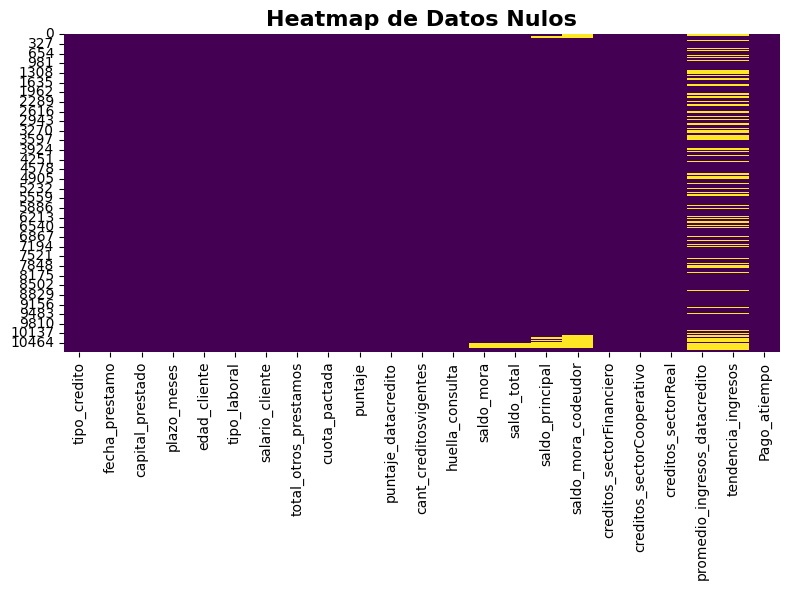

In [12]:
# Heatmap de Datos Nulos

plt.figure(figsize = (8, 6))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Heatmap de Datos Nulos', fontsize = 16, fontweight = 'bold')
plt.tight_layout()

plt.show()

In [13]:
print(df.isnull().sum().sort_values(ascending = False))

tendencia_ingresos               2990
promedio_ingresos_datacredito    2930
saldo_mora_codeudor               590
saldo_principal                   405
saldo_mora                        156
saldo_total                       156
puntaje_datacredito                 6
salario_cliente                     0
tipo_laboral                        0
edad_cliente                        0
plazo_meses                         0
capital_prestado                    0
fecha_prestamo                      0
tipo_credito                        0
total_otros_prestamos               0
cant_creditosvigentes               0
huella_consulta                     0
cuota_pactada                       0
puntaje                             0
creditos_sectorCooperativo          0
creditos_sectorFinanciero           0
creditos_sectorReal                 0
Pago_atiempo                        0
dtype: int64


In [14]:
# Porcentaje de nulos por columnas

for col in df.columns:

    print("El porcentaje de nulos en la columna ", col, "es: ", round(df[col].isnull().mean() * 100, 2), "%")

El porcentaje de nulos en la columna  tipo_credito es:  0.0 %
El porcentaje de nulos en la columna  fecha_prestamo es:  0.0 %
El porcentaje de nulos en la columna  capital_prestado es:  0.0 %
El porcentaje de nulos en la columna  plazo_meses es:  0.0 %
El porcentaje de nulos en la columna  edad_cliente es:  0.0 %
El porcentaje de nulos en la columna  tipo_laboral es:  0.0 %
El porcentaje de nulos en la columna  salario_cliente es:  0.0 %
El porcentaje de nulos en la columna  total_otros_prestamos es:  0.0 %
El porcentaje de nulos en la columna  cuota_pactada es:  0.0 %
El porcentaje de nulos en la columna  puntaje es:  0.0 %
El porcentaje de nulos en la columna  puntaje_datacredito es:  0.06 %
El porcentaje de nulos en la columna  cant_creditosvigentes es:  0.0 %
El porcentaje de nulos en la columna  huella_consulta es:  0.0 %
El porcentaje de nulos en la columna  saldo_mora es:  1.45 %
El porcentaje de nulos en la columna  saldo_total es:  1.45 %
El porcentaje de nulos en la columna  

# Estadísticas Generales

In [15]:
# Con describe

df.describe(include = 'all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
tipo_credito,10763.0,NaN,NaN,NaN,5.411131,4.0,4.0,4.0,9.0,68.0,2.338279
fecha_prestamo,10763,NaN,NaN,NaN,2025-04-16 23:06:02.111121408,2024-11-26 09:17:04,2025-01-20 17:33:07.500000,2025-03-27 16:23:12,2025-06-16 13:27:58,2026-04-26 18:43:52,NaN
capital_prestado,10763.0,NaN,NaN,NaN,2434315.001319,360000.0,1224831.0,1921920.0,3084840.0,41444152.8,1909642.758997
plazo_meses,10763.0,NaN,NaN,NaN,10.575583,2.0,6.0,10.0,12.0,90.0,6.632082
edad_cliente,10763.0,NaN,NaN,NaN,43.94862,19.0,33.0,42.0,53.0,123.0,15.060877
tipo_laboral,10763,2,Empleado,6754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salario_cliente,10763.0,NaN,NaN,NaN,17216431.459909,0.0,2000000.0,3000000.0,4875808.0,22000000000.0,355476717.603482
total_otros_prestamos,10763.0,NaN,NaN,NaN,6238869.648518,0.0,500000.0,1000000.0,2000000.0,6787675263.0,118418316.941069
cuota_pactada,10763.0,NaN,NaN,NaN,243617.406671,23944.0,121041.5,182863.0,287833.5,3816752.0,210493.694608
puntaje,10763.0,NaN,NaN,NaN,91.170036,-38.00999,95.227787,95.227787,95.227787,95.227787,16.465441


In [16]:
# Kurtosis y Skew 

# Columnas numpericas

col_nums = df.select_dtypes(['int64', 'float64']).columns

resultados = []

for col in col_nums:

    kurt = kurtosis(df[col].dropna())
    skew_val = skew(df[col].dropna())
    
    resultados.append({
        'Columna': col,
        'Kurtosis': kurt,
        'Skew-Sesgo': skew_val
    })

kurtosis_skew = pd.DataFrame(resultados)

# Mostrar resultados

kurtosis_skew

,Columna,Kurtosis,Skew-Sesgo
0,tipo_credito,46.442120,2.671702
1,capital_prestado,35.301130,3.723365
2,plazo_meses,7.775949,2.459348
3,edad_cliente,7.864723,1.934129
4,salario_cliente,2210.202459,43.770563
5,total_otros_prestamos,1718.481718,38.458525
6,cuota_pactada,26.637820,3.792772
7,puntaje,24.069268,-4.864929
8,puntaje_datacredito,39.418912,-5.643726
9,cant_creditosvigentes,8.618783,1.797487


# Anotaciones Básicas sobre las Estadística Generales

* **capital_prestado" tien**e créditos de bajo importe donde el 75% de los datos están de $3.1 M hace abajo. Aunque la variabilidad de los datos es alta dada du desviación estandar de $1.9 M.
* **edad** tiene valores normales o estándares de población, sim embargo, el valor máximo es completamente dsfasado.
* **salario_cliente** presenta en gran mayoría valores bajos sin embargo la media y la desviación estándar se ven fuertemente afectados por los valores del percentil 75 en adelante. 
* **total_otros_prestamos** también presenta un sesgo fuerte por los valores del percentil 75 en adelante, ya que el 75% de los datos están en valores pequeños.
* **puntaje** en gran medida presenta valores muy similares, con baja desviación estándar sin embargo el mínimo es un valores negativo, por lo que podría ser un error.
* **puntaje_datacredito** también presenta en su mayoría valores entre 750 y 900.
* **cant_creditosvigentes**, la mayoria de valores están rangos considerables para la variable, el valor máximo resulta impensable inicialmente.

# Variable Objetivo

<Axes: xlabel='Pago_atiempo'>

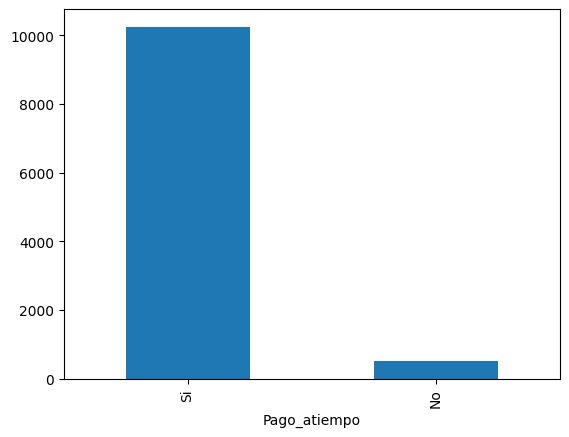

In [17]:
# Conteo de clases para la variable objetivo

df['Pago_atiempo'] = df['Pago_atiempo'].cat.rename_categories({0: "No", 1: "Si"})

df['Pago_atiempo'].value_counts().plot(kind = "bar")

# Cambio de Tipo de Dato

In [18]:
# Cambio de tipo de data (object --> category)

for col in df.columns:

    if df[col].dtype == 'object':

        df[col] = df[col].astype('category')

# Cuadro Resúmen

In [19]:
# Cuadro con todas las variables numericas --> media, mediana, moda, varianza, desviación estándar, mínimo, máximo, cuartiles, IQR

col_nums = df.select_dtypes(['int64', 'float64']).columns

var_num_estadisticas_pd = pd.DataFrame({
    'Media': df[col_nums].mean(),
    'Mediana': df[col_nums].median(),
    'Moda': df[col_nums].mode().iloc[0],
    'Varianza': df[col_nums].var(),
    'Desviación Estándar': df[col_nums].std(),
    'Mínimo': df[col_nums].min(),
    'Máximo': df[col_nums].max(),
    'Q1': df[col_nums].quantile(0.25),
    'Q2': df[col_nums].quantile(0.5),
    'Q3': df[col_nums].quantile(0.75),
    'IQR': df[col_nums].quantile(0.75) - df[col_nums].quantile(0.25)
})

var_num_estadisticas_pd

,Media,Mediana,Moda,Varianza,Desviación Estándar,Mínimo,Máximo,Q1,Q2,Q3,IQR
tipo_credito,5.411131e+00,4.000000e+00,4.000000e+00,5.467548e+00,2.338279e+00,4.00000,6.800000e+01,4.000000e+00,4.000000e+00,9.000000e+00,5.00
capital_prestado,2.434315e+06,1.921920e+06,1.200000e+06,3.646735e+12,1.909643e+06,360000.00000,4.144415e+07,1.224831e+06,1.921920e+06,3.084840e+06,1860009.00
plazo_meses,1.057558e+01,1.000000e+01,6.000000e+00,4.398451e+01,6.632082e+00,2.00000,9.000000e+01,6.000000e+00,1.000000e+01,1.200000e+01,6.00
edad_cliente,4.394862e+01,4.200000e+01,4.000000e+01,2.268300e+02,1.506088e+01,19.00000,1.230000e+02,3.300000e+01,4.200000e+01,5.300000e+01,20.00
salario_cliente,1.721643e+07,3.000000e+06,3.000000e+06,1.263637e+17,3.554767e+08,0.00000,2.200000e+10,2.000000e+06,3.000000e+06,4.875808e+06,2875808.00
total_otros_prestamos,6.238870e+06,1.000000e+06,2.000000e+06,1.402290e+16,1.184183e+08,0.00000,6.787675e+09,5.000000e+05,1.000000e+06,2.000000e+06,1500000.00
cuota_pactada,2.436174e+05,1.828630e+05,2.059900e+05,4.430760e+10,2.104937e+05,23944.00000,3.816752e+06,1.210415e+05,1.828630e+05,2.878335e+05,166792.00
puntaje,9.117004e+01,9.522779e+01,9.522779e+01,2.711108e+02,1.646544e+01,-38.00999,9.522779e+01,9.522779e+01,9.522779e+01,9.522779e+01,0.00
puntaje_datacredito,7.807908e+02,7.910000e+02,0.000000e+00,1.099940e+04,1.048780e+02,-7.00000,9.990000e+02,7.570000e+02,7.910000e+02,8.250000e+02,68.00
cant_creditosvigentes,5.726749e+00,5.000000e+00,4.000000e+00,1.581782e+01,3.977162e+00,0.00000,6.200000e+01,3.000000e+00,5.000000e+00,8.000000e+00,5.00


In [20]:
# Conocer la distribución de las variables numéricas

distributions = [st.norm, st.expon, st.gamma, st.lognorm]

for dist in distributions:

    for col in col_nums:
    
        params = dist.fit(df[col].dropna())
        ks_stat, p_value = st.kstest(df[col].dropna(), dist.name, args = params)
        
        print(f"{dist.name} - {col} - p-value: {p_value}")

norm - tipo_credito - p-value: 0.0
norm - capital_prestado - p-value: 1.5228745436836422e-189
norm - plazo_meses - p-value: 0.0
norm - edad_cliente - p-value: 1.421810346120418e-57
norm - salario_cliente - p-value: 0.0
norm - total_otros_prestamos - p-value: 0.0
norm - cuota_pactada - p-value: 3.076450025227183e-275
norm - puntaje - p-value: 0.0
norm - puntaje_datacredito - p-value: 0.0
norm - cant_creditosvigentes - p-value: 8.322673987404575e-158
norm - huella_consulta - p-value: 3.4468324389484335e-233
norm - saldo_mora - p-value: 0.0
norm - saldo_total - p-value: 0.0
norm - saldo_principal - p-value: 0.0
norm - saldo_mora_codeudor - p-value: 0.0
norm - creditos_sectorFinanciero - p-value: 3.797369643716601e-278
norm - creditos_sectorCooperativo - p-value: 0.0
norm - creditos_sectorReal - p-value: 0.0
norm - promedio_ingresos_datacredito - p-value: 0.0
expon - tipo_credito - p-value: 0.0
expon - capital_prestado - p-value: 9.14563667245312e-109
expon - plazo_meses - p-value: 0.0
exp

c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_continuous_distns.py:6927: RuntimeWarning: divide by zero encountered in log
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_continuous_distns.py:6927: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


lognorm - salario_cliente - p-value: 2.0697257994676534e-147
lognorm - total_otros_prestamos - p-value: 0.0
lognorm - cuota_pactada - p-value: 0.009848571481628121


c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_continuous_distns.py:6918: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


lognorm - puntaje - p-value: 0.0
lognorm - puntaje_datacredito - p-value: 0.0
lognorm - cant_creditosvigentes - p-value: 0.0
lognorm - huella_consulta - p-value: 0.0


c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1554: RuntimeWarning: overflow encountered in divide
  x = (asarray(x)-loc) / scale


lognorm - saldo_mora - p-value: 0.0
lognorm - saldo_total - p-value: 0.0
lognorm - saldo_principal - p-value: 0.0
lognorm - saldo_mora_codeudor - p-value: 0.0
lognorm - creditos_sectorFinanciero - p-value: 0.0
lognorm - creditos_sectorCooperativo - p-value: 0.0
lognorm - creditos_sectorReal - p-value: 0.0
lognorm - promedio_ingresos_datacredito - p-value: 0.0


# EDA Univariable (Numéricas)

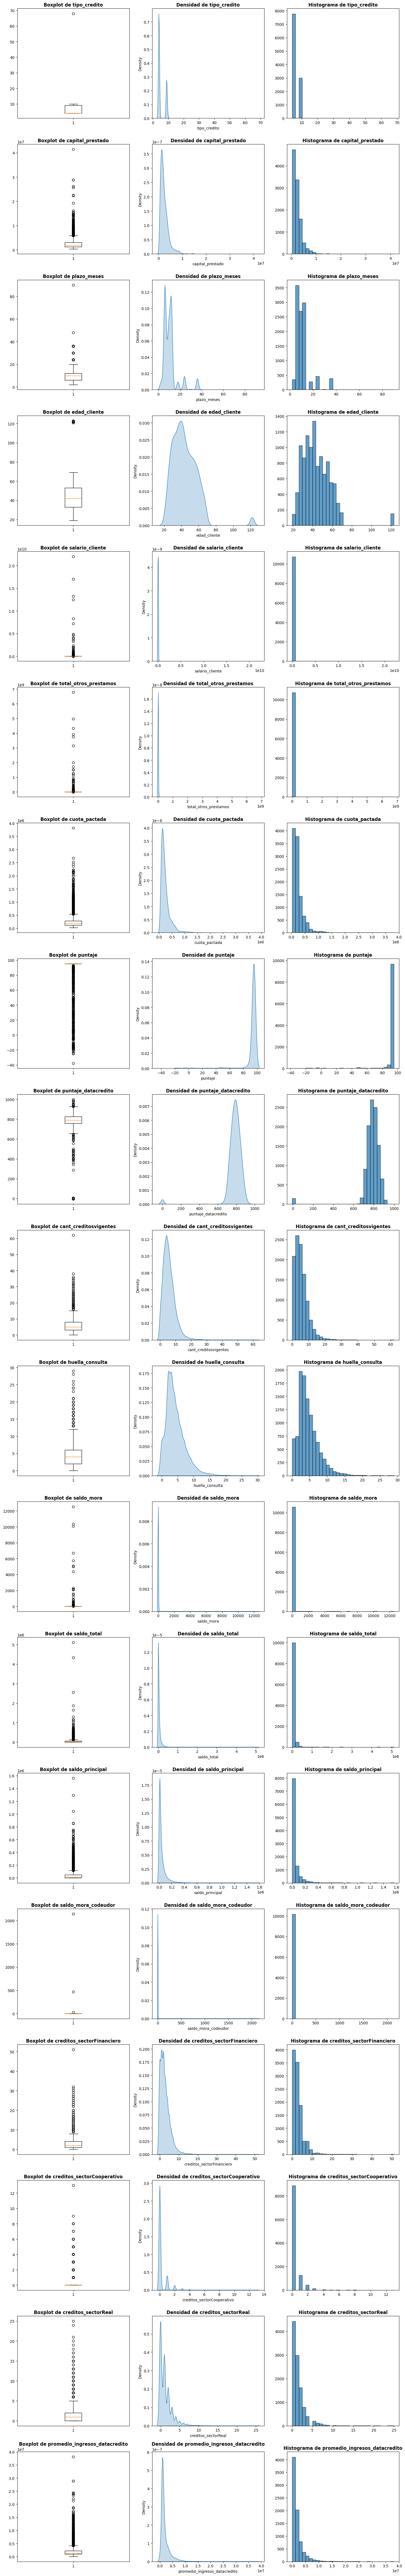

In [21]:
# Visualización de BoxPlot e Histograma de Densisdad para variables numéricas

if True:

    fig, axes = plt.subplots(nrows = len(col_nums), ncols = 3, figsize = (15, 5 * len(col_nums)))

    if len(col_nums) == 1:

        axes = axes.reshape(1, 3)

    for i, col in enumerate(col_nums):

        axes[i, 2].hist(df[col].dropna(), bins = 30, edgecolor = "black", alpha = 0.7)
        axes[i, 2].set_title(f"Histograma de {col}", fontweight = 'bold')

        sns.kdeplot(df[col], fill = True, ax = axes[i, 1])
        axes[i, 1].set_title(f"Densidad de {col}", fontweight = 'bold')

        axes[i, 0].boxplot(df[col].dropna(), vert = 0) 
        axes[i, 0].set_title(f"Boxplot de {col}", fontweight = 'bold')       

    plt.tight_layout()
    plt.show()

# Anotaciones sobre las gráficas

* 
* 
* 

# Análisis Numérico por Intervalos

In [22]:
# Creación de Tablas de Frcuencia para variables numéricas agrupadas por intervalos


# Generación de tabla de frecuencias para variable numérica agrupada en bins

def tabla_intervalos_numericos(df, col, bins = 5):

    # Creación de Intervalos 

    rangos = pd.cut(df[col], bins = bins)

    # Agrupación por intervalos y conteo de registros en cada intervalo

    tabla = (
        df.groupby(rangos, observed = False)[col]
          .count()
          .reset_index(name = "conteo")
          .sort_values(by = col)   
          .reset_index(drop = True)
    )

    # Calculo del procentaje de registros en cada intervalo

    tabla["porcentaje"] = (tabla["conteo"] / len(df) * 100)

    # Formatear porcentaje a dos decimales

    tabla["porcentaje"] = tabla["porcentaje"].map(lambda x: f"{x:.2f}%")

    return tabla

In [23]:
# Invocar la función

if True:

    for col in col_nums:

        print(f"\nTabla de Frecuencia para {col} agrupada en 5 intervalos:")

        display(tabla_intervalos_numericos(df, col, bins = 5))


Tabla de Frecuencia para tipo_credito agrupada en 5 intervalos:


,tipo_credito,conteo,porcentaje
0,"(3.936, 16.8]",10762,99.99%
1,"(16.8, 29.6]",0,0.00%
2,"(29.6, 42.4]",0,0.00%
3,"(42.4, 55.2]",0,0.00%
4,"(55.2, 68.0]",1,0.01%



Tabla de Frecuencia para capital_prestado agrupada en 5 intervalos:


,capital_prestado,conteo,porcentaje
0,"(318915.847, 8576830.56]",10615,98.62%
1,"(8576830.56, 16793661.12]",140,1.30%
2,"(16793661.12, 25010491.68]",3,0.03%
3,"(25010491.68, 33227322.24]",4,0.04%
4,"(33227322.24, 41444152.8]",1,0.01%



Tabla de Frecuencia para plazo_meses agrupada en 5 intervalos:


,plazo_meses,conteo,porcentaje
0,"(1.912, 19.6]",9880,91.80%
1,"(19.6, 37.2]",881,8.19%
2,"(37.2, 54.8]",1,0.01%
3,"(54.8, 72.4]",0,0.00%
4,"(72.4, 90.0]",1,0.01%



Tabla de Frecuencia para edad_cliente agrupada en 5 intervalos:


,edad_cliente,conteo,porcentaje
0,"(18.896, 39.8]",4614,42.87%
1,"(39.8, 60.6]",5012,46.57%
2,"(60.6, 81.4]",987,9.17%
3,"(81.4, 102.2]",0,0.00%
4,"(102.2, 123.0]",150,1.39%



Tabla de Frecuencia para salario_cliente agrupada en 5 intervalos:


,salario_cliente,conteo,porcentaje
0,"(-22000000.0, 4400000000.0]",10755,99.93%
1,"(4400000000.0, 8800000000.0]",4,0.04%
2,"(8800000000.0, 13200000000.0]",1,0.01%
3,"(13200000000.0, 17600000000.0]",2,0.02%
4,"(17600000000.0, 22000000000.0]",1,0.01%



Tabla de Frecuencia para total_otros_prestamos agrupada en 5 intervalos:


,total_otros_prestamos,conteo,porcentaje
0,"(-6787675.263, 1357535052.6]",10753,99.91%
1,"(1357535052.6, 2715070105.2]",4,0.04%
2,"(2715070105.2, 4072605157.8]",3,0.03%
3,"(4072605157.8, 5430140210.4]",2,0.02%
4,"(5430140210.4, 6787675263.0]",1,0.01%



Tabla de Frecuencia para cuota_pactada agrupada en 5 intervalos:


,cuota_pactada,conteo,porcentaje
0,"(20151.192, 782505.6]",10501,97.57%
1,"(782505.6, 1541067.2]",227,2.11%
2,"(1541067.2, 2299628.8]",30,0.28%
3,"(2299628.8, 3058190.4]",4,0.04%
4,"(3058190.4, 3816752.0]",1,0.01%



Tabla de Frecuencia para puntaje agrupada en 5 intervalos:


,puntaje,conteo,porcentaje
0,"(-38.143, -11.362]",67,0.62%
1,"(-11.362, 15.285]",140,1.30%
2,"(15.285, 41.933]",121,1.12%
3,"(41.933, 68.58]",210,1.95%
4,"(68.58, 95.228]",10225,95.00%



Tabla de Frecuencia para puntaje_datacredito agrupada en 5 intervalos:


,puntaje_datacredito,conteo,porcentaje
0,"(-8.006, 194.2]",147,1.37%
1,"(194.2, 395.4]",6,0.06%
2,"(395.4, 596.6]",19,0.18%
3,"(596.6, 797.8]",5796,53.85%
4,"(797.8, 999.0]",4789,44.50%



Tabla de Frecuencia para cant_creditosvigentes agrupada en 5 intervalos:


,cant_creditosvigentes,conteo,porcentaje
0,"(-0.062, 12.4]",10176,94.55%
1,"(12.4, 24.8]",550,5.11%
2,"(24.8, 37.2]",35,0.33%
3,"(37.2, 49.6]",1,0.01%
4,"(49.6, 62.0]",1,0.01%



Tabla de Frecuencia para huella_consulta agrupada en 5 intervalos:


,huella_consulta,conteo,porcentaje
0,"(-0.029, 5.8]",7904,73.44%
1,"(5.8, 11.6]",2562,23.80%
2,"(11.6, 17.4]",262,2.43%
3,"(17.4, 23.2]",29,0.27%
4,"(23.2, 29.0]",6,0.06%



Tabla de Frecuencia para saldo_mora agrupada en 5 intervalos:


,saldo_mora,conteo,porcentaje
0,"(-12.534, 2506.8]",10599,98.48%
1,"(2506.8, 5013.6]",2,0.02%
2,"(5013.6, 7520.4]",3,0.03%
3,"(7520.4, 10027.2]",0,0.00%
4,"(10027.2, 12534.0]",3,0.03%



Tabla de Frecuencia para saldo_total agrupada en 5 intervalos:


,saldo_total,conteo,porcentaje
0,"(-5116.066, 1023213.2]",10598,98.47%
1,"(1023213.2, 2046426.4]",6,0.06%
2,"(2046426.4, 3069639.6]",1,0.01%
3,"(3069639.6, 4092852.8]",0,0.00%
4,"(4092852.8, 5116066.0]",2,0.02%



Tabla de Frecuencia para saldo_principal agrupada en 5 intervalos:


,saldo_principal,conteo,porcentaje
0,"(-1562.285, 312457.0]",10239,95.13%
1,"(312457.0, 624914.0]",105,0.98%
2,"(624914.0, 937371.0]",11,0.10%
3,"(937371.0, 1249828.0]",1,0.01%
4,"(1249828.0, 1562285.0]",2,0.02%



Tabla de Frecuencia para saldo_mora_codeudor agrupada en 5 intervalos:


,saldo_mora_codeudor,conteo,porcentaje
0,"(-2.145, 429.0]",10171,94.50%
1,"(429.0, 858.0]",1,0.01%
2,"(858.0, 1287.0]",0,0.00%
3,"(1287.0, 1716.0]",0,0.00%
4,"(1716.0, 2145.0]",1,0.01%



Tabla de Frecuencia para creditos_sectorFinanciero agrupada en 5 intervalos:


,creditos_sectorFinanciero,conteo,porcentaje
0,"(-0.051, 10.2]",10585,98.35%
1,"(10.2, 20.4]",162,1.51%
2,"(20.4, 30.6]",13,0.12%
3,"(30.6, 40.8]",2,0.02%
4,"(40.8, 51.0]",1,0.01%



Tabla de Frecuencia para creditos_sectorCooperativo agrupada en 5 intervalos:


,creditos_sectorCooperativo,conteo,porcentaje
0,"(-0.013, 2.6]",10546,97.98%
1,"(2.6, 5.2]",197,1.83%
2,"(5.2, 7.8]",14,0.13%
3,"(7.8, 10.4]",5,0.05%
4,"(10.4, 13.0]",1,0.01%



Tabla de Frecuencia para creditos_sectorReal agrupada en 5 intervalos:


,creditos_sectorReal,conteo,porcentaje
0,"(-0.025, 5.0]",10413,96.75%
1,"(5.0, 10.0]",299,2.78%
2,"(10.0, 15.0]",41,0.38%
3,"(15.0, 20.0]",7,0.07%
4,"(20.0, 25.0]",3,0.03%



Tabla de Frecuencia para promedio_ingresos_datacredito agrupada en 5 intervalos:


,promedio_ingresos_datacredito,conteo,porcentaje
0,"(-38106.581, 7621316.2]",7625,70.84%
1,"(7621316.2, 15242632.4]",184,1.71%
2,"(15242632.4, 22863948.6]",17,0.16%
3,"(22863948.6, 30485264.8]",6,0.06%
4,"(30485264.8, 38106581.0]",1,0.01%


# Análisis de los Intervalos

*
*
*


# EDA Univariable (Categóricas)

In [24]:
#  Columnas Categóricas y sus valores

col_cats = df.select_dtypes(include = ['object', 'category']).columns

for col in col_cats:

    print(f'Columna: {col}')
    print(df[col].value_counts(dropna = False))
    print("--" * 15)

Columna: tipo_laboral
tipo_laboral
Empleado         6754
Independiente    4009
Name: count, dtype: int64
------------------------------
Columna: tendencia_ingresos
tendencia_ingresos
Creciente      5294
NaN            2990
Decreciente    1291
Estable        1188
Name: count, dtype: int64
------------------------------
Columna: Pago_atiempo
Pago_atiempo
Si    10252
No      511
Name: count, dtype: int64
------------------------------


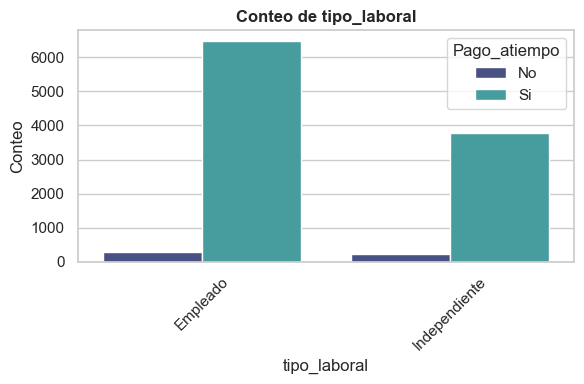

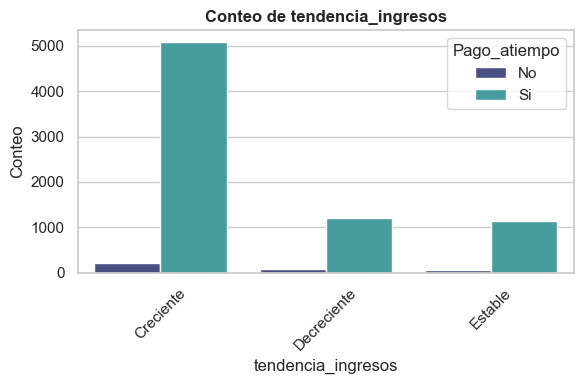

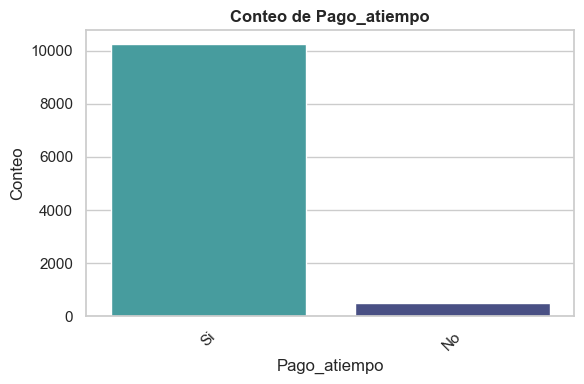

In [25]:
# Graficas variables categoricas

sns.set_theme(style = "whitegrid")

for i, col in enumerate(col_cats):

    plt.figure(figsize = (6, 4))
    sns.countplot(data = df, x = col, hue = 'Pago_atiempo', order = df[col].value_counts().index, palette = 'mako')
    plt.xticks(rotation = 45)
    plt.title('Conteo de ' + col, fontsize = 12, fontweight = 'bold')
    plt.tight_layout()
    plt.xlabel(col)
    plt.ylabel('Conteo')

    plt.show()

# Análisis Bivariable (Numéricas)

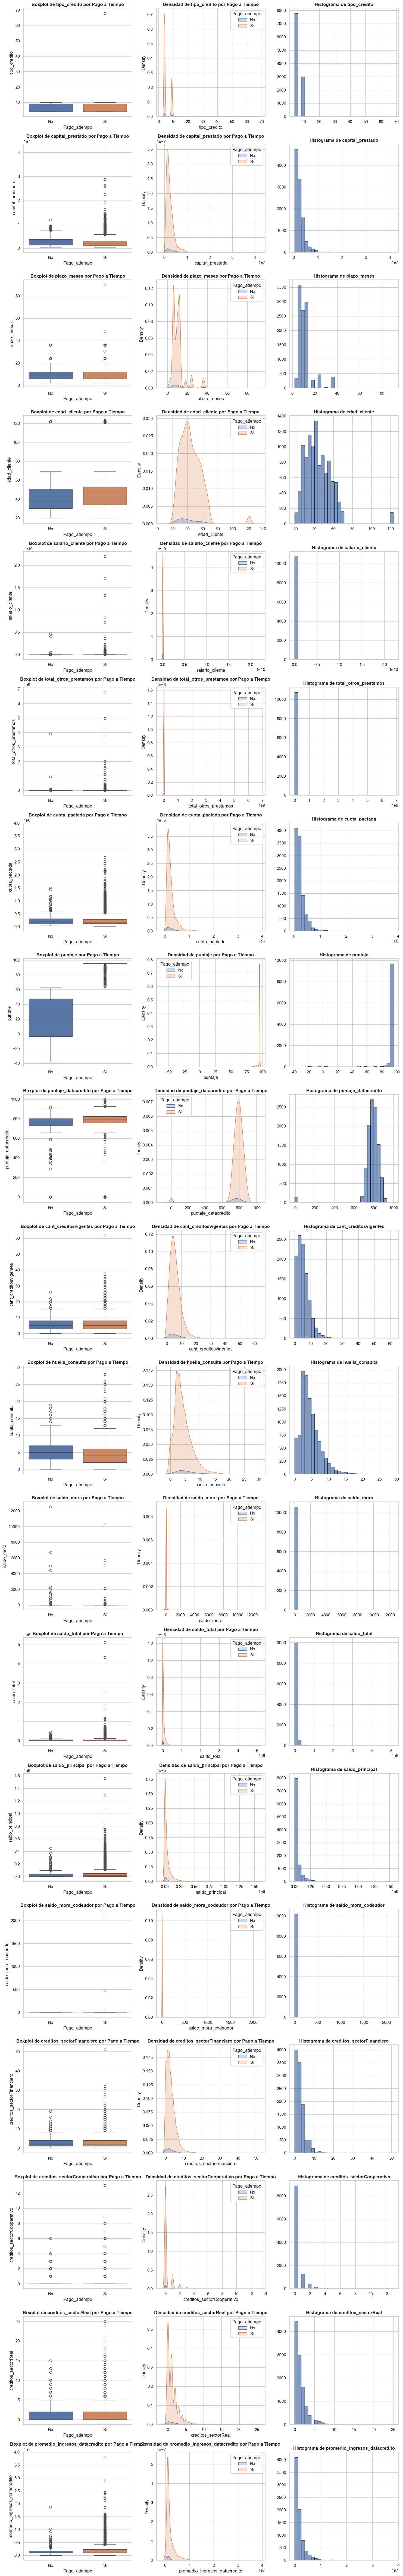

In [26]:
# Gráfico de Densidad y Boxplot respecto a la variable objetivo "Pago_atiempo"

if True:

    fig, axes = plt.subplots(nrows = len(col_nums), ncols = 3, figsize = (15, 5 * len(col_nums)))

    if len(col_nums) == 1:

        axes = axes.reshape(1, 3)

    for i, col in enumerate(col_nums):

        sns.kdeplot(data = df, x = col, hue = 'Pago_atiempo', fill = True, ax = axes[i, 1], warn_singular = False)
        axes[i, 1].set_title(f"Densidad de {col} por Pago a Tiempo", fontweight = 'bold')

        sns.boxplot(data = df, x = 'Pago_atiempo', y = col, hue = 'Pago_atiempo', ax = axes[i, 0])
        axes[i, 0].set_title(f"Boxplot de {col} por Pago a Tiempo", fontweight = 'bold')
        axes[i, 2].hist(df[col].dropna(), bins = 30, edgecolor = "black", alpha = 0.7)

        axes[i, 2].set_title(f"Histograma de {col}", fontweight = 'bold')
    plt.tight_layout()
    plt.show()

# Análisis Bivariable (Categóricas)

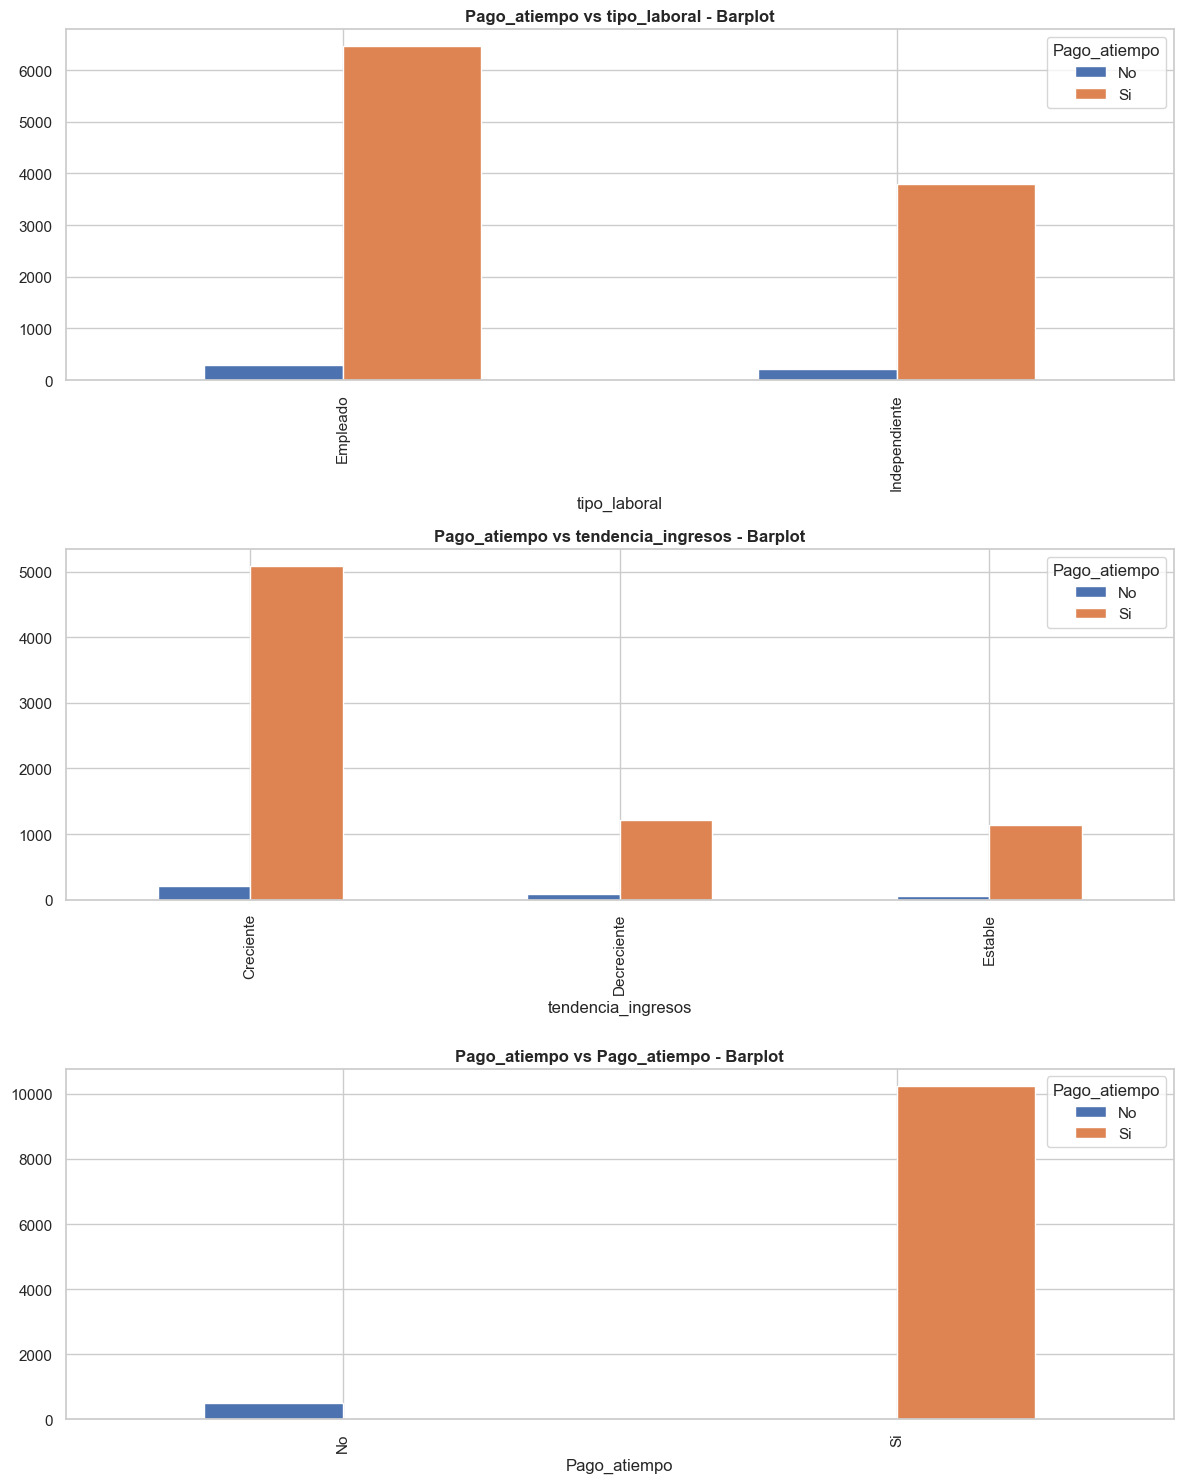

In [27]:
# Análisis bivarible respecto a la variable objetivo "Pago_atiempo" 

if True:

    fig, axes = plt.subplots(
        nrows = len(col_cats),
        ncols = 1,
        figsize = (12, 5 * max(len(col_cats), 1))
    )

    if len(col_cats) == 1:

        axes = [axes]

    for i, col in enumerate(col_cats):

        pd.crosstab(df[col], df["Pago_atiempo"]).plot(kind = "bar", ax = axes[i])

        axes[i].set_title(f"Pago_atiempo vs {col} - Barplot", fontweight = "bold")

    plt.tight_layout()
    plt.show()

# Detección Imputación de Outliers

En la variable "**edad_cliente**" tenemos 150 registros con edades superiores a 90. A pesar  que los 90 pueden ser una edad factible de bancarización, al hacer una búsqueda con un rango de edad superior a 100, se evidencias 150 registros, lo cual es impráctico e inverosimil para este caso.

In [28]:
# Valores con atípicos: personas mayores a 90 años --> np.nan

df.loc[df['edad_cliente'] > 90, 'edad_cliente'] = np.nan

print(df['edad_cliente'].max())

69.0


En la columna "**total_otros_prestamos**", al revisar los individuos en los percentiles superiores observamos que existe una correspondencia entre un valor alto en esta columna junto con el salario_cliente (13 registros). Existe un caso, donde el valor de otros prestamos es de COP $1.500.000.000  y el salario del cliente es de COP $3.000.000, además el promedio_ingresos_datacredito es de COP $1.500.000. No es viable que una entidad financiera le otorgue un crédito a este individuo teniendo en cuenta esta características, esto indica un nivel de riesgo alto ya que esta persona debe 500 veces su ingreso mensual.

In [29]:
# Buscando valores atípicos

# print(df['total_otros_prestamos'].quantile(1)) 

# Ver solo los registros con valores mayores a 100000000 en la columna "total_otros_prestamos"

# Poner null en "total_otros_prestamos" para el registro con valor de COP $1500000000

df.loc[df['total_otros_prestamos'] == 1500000000, 'total_otros_prestamos'] = np.nan

Respecto a la variable "**cant_creditosvigentes**", como se evidencia en el boxplot, la mayoría de valores se encuentran concentrados entre 0 y 10. No obstante, resulta curioso tachar de outliers los datos por fuera de los bigotes, que son numerosos y pueden ser factibles (no imposibles) en el entorno.

In [30]:
# Revisar datos superiores al percentil 99 de la columna "cant_creditosvigentes"

cant_creditos_top_1 = []

for i in df['cant_creditosvigentes']:

    if i > df['cant_creditosvigentes'].quantile(0.99):

        cant_creditos_top_1.append(i)

print(len(cant_creditos_top_1))

99


Sigamos con la variable "**creditos_sectorFinanciero**" presenta un comportamiento similar a las columnas anteriores, con valores altos pero posibles. Al revisar los individuos con maypr cantidad de creditos en el sector financiero, se observa que el valor que se debe no supera las 10-15 veces su salario, por lo que no se podría considerar como outliers a pesar de estar por fuera del percentil 99.5.

In [31]:
# Conocer los regsitros por fuera del percentil 99 en la columna "creditos_sectorFinanciero"

df.loc[df['creditos_sectorFinanciero'] > df['creditos_sectorFinanciero'].quantile(0.995)].head(50).sort_values(by = 'creditos_sectorFinanciero', ascending = False)

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
5216,9,2025-01-29 15:02:27,1141042.8,10,47.0,Empleado,3800000,1500000.0,96778,95.227787,...,0.0,75110.0,75110.0,0.0,51,1,8,4098064.0,Creciente,Si
3144,4,2025-05-10 10:33:09,2239966.8,12,37.0,Empleado,1600000,500000.0,178684,95.227787,...,0.0,33908.0,33908.0,0.0,32,0,3,941789.0,Creciente,Si
7387,4,2025-01-30 12:13:06,3238680.0,6,29.0,Empleado,6500000,2800000.0,481032,95.227787,...,0.0,50198.0,50198.0,0.0,31,0,0,966667.0,Creciente,Si
8724,4,2025-01-10 17:26:32,6600000.0,36,31.0,Empleado,8500000,2000000.0,213362,95.227787,...,0.0,60571.0,60571.0,0.0,30,0,0,1706666.0,Creciente,Si
6208,4,2025-06-02 10:51:24,3849600.0,6,59.0,Empleado,50000000,45000000.0,574645,95.227787,...,0.0,697248.0,636942.0,0.0,29,0,2,4654251.0,Creciente,Si
2464,4,2025-05-05 09:59:22,1080000.0,6,62.0,Empleado,4760000,1500000.0,161759,95.227787,...,0.0,48851.0,48851.0,0.0,28,0,4,946640.0,Creciente,Si
3151,9,2025-05-15 11:21:29,3169874.4,9,43.0,Empleado,12115000,6000000.0,296748,95.227787,...,0.0,152026.0,152026.0,0.0,27,3,0,381691.0,Creciente,Si
865,9,2025-03-15 17:47:54,1414458.0,10,49.0,Independiente,7000000,2000000.0,120094,95.227787,...,0.0,48267.0,46255.0,0.0,27,0,0,1300000.0,Estable,Si
5705,4,2024-12-01 18:43:21,1440000.0,24,49.0,Empleado,20000000,12000000.0,62951,95.227787,...,0.0,523885.0,393016.0,0.0,26,0,2,6406696.0,Creciente,Si
7146,9,2025-03-20 11:42:16,1604400.0,2,28.0,Independiente,5000000,2000000.0,632696,95.227787,...,0.0,42145.0,42145.0,0.0,25,0,3,3271433.0,Creciente,Si


La situación con las variables "**creditos_sectorCooperativo**", "**creditos_sectorReal**" presenta la misma naturaleza de la variable anteriormente analizada.